In [1]:
import iris
import iris.cube
import numpy as np
import cf_units 
import progressbar
import matplotlib.pyplot as plt
import iris.plot as iplt
import cartopy.crs as ccrs
import matplotlib.colors as mcolors
from scipy.ndimage import convolve, gaussian_filter
import datetime as dt

In [2]:
gdd_real = {"ACCESS1-0":("cmip5","r1i1p1"),"erai":("era",'r0')}
outpath = "/short/tp28/eh6215/esci/"

erai = iris.load(outpath+"rainfall_onset_erai.nc")
erai_C = iris.load(outpath+"rainfall_onset_erai-C.nc")
ACCESS = iris.load(outpath+"rainfall_onset_ACCESS1-0.nc")
QME = iris.load(outpath+"rainfall_onset_ACCESS1-0_QME.nc")

In [3]:
ticks = [[(dt.datetime(2012+int(month<6),month,day)-dt.datetime(2012,1,1)).days for day in [1,11,21]] for month in [9,10,11,12,1,2,3]]
ticks = [item for sublist in ticks for item in sublist][:-2]
colours =map(lambda x: plt.cm.Spectral_r(x-int(x<1/2)*1/16) if x>1/3 else plt.cm.RdBu_r(x),np.linspace(0,1,100))
cmap = mcolors.LinearSegmentedColormap.from_list('onset',list(colours))
cy =  iris.Constraint(latitude=lambda y: y>-29)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


[Text(244, 0, '1 Sep'),
 Text(274, 0, '1 Oct'),
 Text(305, 0, '1 Nov'),
 Text(335, 0, '1 Dec'),
 Text(366, 0, '1 Jan'),
 Text(397, 0, '1 Feb'),
 Text(425, 0, '1 Mar')]

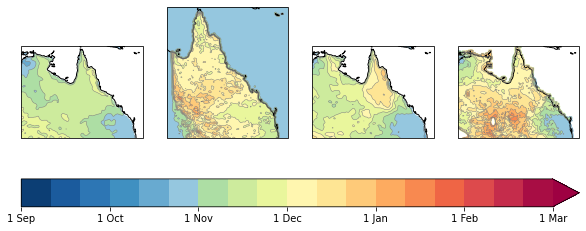

In [4]:
plt.figure(figsize=(10,5))
axs = []  
for i,data in enumerate([erai,erai_C,ACCESS,QME]):
    ax=plt.subplot(1,4,i+1,projection=ccrs.PlateCarree())
    x = data[0].extract(cy).collapsed('time',iris.analysis.PERCENTILE,percent=50)
    x.data = np.ma.masked_array(x.data,x.data<275)
    mask = x.data.mask
    mask = convolve(mask,np.ones((2,2)))==1
    x.data = gaussian_filter(x.data,2)
    x.data = np.ma.masked_array(x.data, mask)
    a=iplt.contourf(x,ticks,cmap=cmap,extend='max')
    iplt.contour(x,ticks,colors='0.5',linewidths=0.5)
    ax.coastlines()
    axs.append(ax)
#
cax = plt.colorbar(a,ax=axs,ticks = ticks[::3],orientation='horizontal')
cax.ax.set_xticklabels(["1 %s"%mon for mon in ['Sep','Oct','Nov',"Dec","Jan","Feb","Mar"]])


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


[Text(244, 0, '1 Sep'),
 Text(274, 0, '1 Oct'),
 Text(305, 0, '1 Nov'),
 Text(335, 0, '1 Dec'),
 Text(366, 0, '1 Jan'),
 Text(397, 0, '1 Feb'),
 Text(425, 0, '1 Mar')]

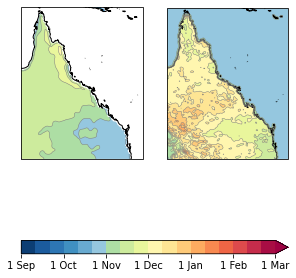

In [6]:
plt.figure(figsize=(10,10))
axs = []  
for i,data in enumerate([erai,erai_C]):
    ax=plt.subplot(1,4,i+1,projection=ccrs.PlateCarree())
    x = data[0].extract(cy).collapsed('time',iris.analysis.PERCENTILE,percent=50)
    x.data = np.ma.masked_array(x.data,x.data<275)
    mask = x.data.mask
    mask = convolve(mask,np.ones((2,2)))==1
    x.data = gaussian_filter(x.data,2)
    x.data = np.ma.masked_array(x.data, mask)
    a=iplt.contourf(x,ticks,cmap=cmap,extend='max')
    iplt.contour(x,ticks,colors='0.5',linewidths=0.5)
    ax.coastlines()
    axs.append(ax)
    plt.xlim(140,155)
    
#
cax = plt.colorbar(a,ax=axs,ticks = ticks[::3],orientation='horizontal')
cax.ax.set_xticklabels(["1 %s"%mon for mon in ['Sep','Oct','Nov',"Dec","Jan","Feb","Mar"]])